In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## linear algebra
Most of these notes correspond to the [video lectures](http://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/) by Professor Gilbert Strang of MIT.

### the geometry of linear equations
The fundamental problem of linear algebra is to solve a system of linear equations. We'll start with the case of $n$ equations and $n$ unknowns.

Here are two lines that cross somewhere in a plane we're looking for the point where they cross.

$
\left\{
\begin{aligned}
2x - y &= 0 \\ 
-x + 2y &= 3
\end{aligned}
\right.
$

As a preview (and because it's so easy to do) we'll quickly skip to the *matrix form* and write down:

$
\begin{bmatrix}2 & -1 \\ -1 & 2\end{bmatrix}
\begin{bmatrix}x \\ y\end{bmatrix} = 
\begin{bmatrix}0 \\ 3\end{bmatrix}
$

Where $A = \begin{bmatrix}2 & -1 \\ -1 & 2\end{bmatrix}$ $x = \begin{bmatrix}x \\ y\end{bmatrix}$ and $b = \begin{bmatrix}0 \\ 3\end{bmatrix}$.

We'll end up with $Ax = b$.

#### row picture
Let's start by plotting the equations.

$
\left\{
\begin{aligned}
2x - y &= 0 \implies y = 2x\\ 
-x + 2y &= 3 \implies 2y = x + 3 \implies y = \frac{1}{2}x + 1\frac{1}{2}
\end{aligned}
\right.
$

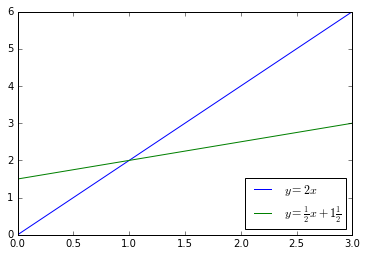

In [101]:
f1 = lambda x: 2*x
f2 = lambda x: (1/2*x) + 1 + (1/2)
x = np.linspace(0, 3, 100)
plt.plot(x, f1(x), label=r'$y = 2x$')
plt.plot(x, f2(x), label=r'$y = \frac{1}{2}x + 1\frac{1}{2}$')
plt.legend(loc=4)

We are interested in the value of $x$ where $2x = \frac{1}{2}x + 1\frac{1}{2}$ we can solve this pretty easily by saying that $2x - \frac{1}{2}x = 1\frac{1}{2}$ which simplifies to $1\frac{1}{2}x = 1\frac{1}{2}$. Now we can divide both sides by $1\frac{1}{2}$ and we'll end up with $x = 1$.

#### column picture
Let's take a look at the columns of the matrix form.

$x\begin{bmatrix}2 \\ -1\end{bmatrix} + y\begin{bmatrix}-1 \\ 2\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}$

The equation above is asking us to somehow combine the two vectors in the right amounts so we'll end up with a vector $\begin{bmatrix}0 \\ 3\end{bmatrix}$. 

We need to find the right *linear combination* of $x$ and $y$. We'll start by plotting the vectors.

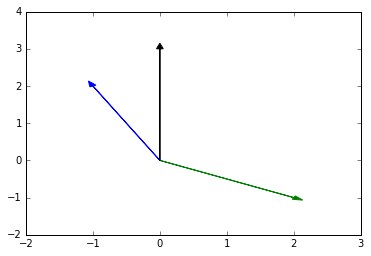

In [90]:
ax = plt.axes()
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 4)
ax.arrow(0, 0, 2, -1, head_width=0.1, fc='g', ec='g', label='foo')
ax.arrow(0, 0, -1, 2, head_width=0.1, fc='b', ec='b')
ax.arrow(0, 0, 0, 3, head_width=0.1, fc='k', ec='k')

From the row picture earlier we already know that the right combination is $x = 1$ and $y = 2$ so:

$1\begin{bmatrix}2 \\ -1\end{bmatrix} + 2\begin{bmatrix}-1 \\ 2\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}$

We can plot and show how it works as well.

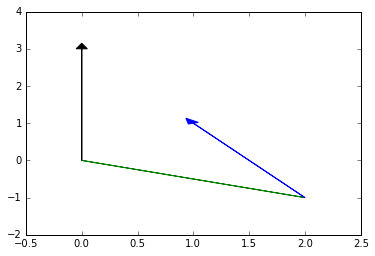

In [89]:
ax = plt.axes()
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-2, 4)
ax.arrow(0, 0, 2, -1, head_width=0.0, fc='g', ec='g', label='foo')
ax.arrow(2, -1, -1, 2, head_width=0.1, fc='b', ec='b')
ax.arrow(0, 0, 0, 3, head_width=0.1, fc='k', ec='k')

Let's do a 3D example.

$
\left\{
\begin{aligned}
2x - &y &= 0 \\ 
-x + 2&y - z &= -1 \\
-3&y + 4z &= 4
\end{aligned}
\right.
$

We're in three dimensions with unknowns $x$, $y$ and $z$.

The matrix $A$ is $\begin{bmatrix}2 & -1 & 0\\-1 & 2 & -1\\0 & -3 & 4\end{bmatrix}$

And our right hand side $b$ is the vector $\begin{bmatrix}0 \\ -1 \\ 4\end{bmatrix}$

Looking at the *row picture*, when dealing with a $2 \times 2$ problem each row is a line in two dimensions. Each row in a $3 \times 3$ problem gives us a plane in three dimensions.

If we look at the *column picture* we get:

$x\begin{bmatrix}2\\-1\\0\end{bmatrix} + y\begin{bmatrix}-1\\2\\-3\end{bmatrix} + z\begin{bmatrix}0\\-1\\4\end{bmatrix} = \begin{bmatrix}0\\-1\\4\end{bmatrix}$

And we can already see that $x = 0$, $y = 0$ and $z = 1$. Of course we won't always be able to see it so easily though.

In [100]:
vec3 = lambda x,y,z: np.array((x,y,z))
A, B, C = vec3(2, -1, 0), vec3(-1, 2, -3), vec3(0, -1, 4)
x, y, z = 0, 0, 1
(x*A) + (y*B) + (z*C)

array([ 0, -1,  4])

Let's change the right hand side to something different so that we have:

$x\begin{bmatrix}2\\-1\\0\end{bmatrix} + y\begin{bmatrix}-1\\2\\-3\end{bmatrix} + z\begin{bmatrix}0\\-1\\4\end{bmatrix} = \begin{bmatrix}1\\1\\-3\end{bmatrix}$

In this case we made up $b$ by taking the sum of the first two columns of $A$:

$b = \begin{bmatrix}2\\-1\\0\end{bmatrix} + \begin{bmatrix}-1\\2\\-3\end{bmatrix} = \begin{bmatrix}1\\1\\-3\end{bmatrix}$

And $x = 1$, $y = 1$ and $z = 0$. Which makes sense since $b$ is the sum of the $x$ and $y$ components.

### matrix form
Now we can ask the question, can we solve $Ax = b$ for every $b$? Do the linear combinations of the columns fill three (or $n$) dimensional space? It depends on $A$. In the case of matrix $A$ above yes, because it's a *nonsingular matrix* and *invertible matrix*.

If all the vectors that make up $A$ are in the same plane we cannot compute $Ax = b$ for every $b$. We can compute $b$ for all the points that are in the plane but all those outside are unreachable. The matrix would be *singular* and **not** invertible.

#### matrix times vector
The basic equation we're dealing with is $Ax = b$ where $A$ is some kind of matrix that represents an operation and $V$ is a vector.

We can multiply them as columns. This basically takes the components of vector $x$ as scalars for the column vectors in matrix $A$.

$\begin{bmatrix}2 & 5\\1 & 3\end{bmatrix} + \begin{bmatrix}1\\2\end{bmatrix} = 1\begin{bmatrix}2\\1\end{bmatrix} + 2\begin{bmatrix}5\\3\end{bmatrix} = \begin{bmatrix}12\\7\end{bmatrix}$

You can also do it by doing it a row at a time which is also known as the **dot product**:

$
\begin{bmatrix}(2 \cdot 1) + (5 \cdot 2) \\(1 \cdot 1) + (3 \cdot 2)\end{bmatrix} = \begin{bmatrix}12\\7\end{bmatrix}
$

We can also say that $Ax$ is a combination of vector $x$ and the columns of matrix $A$.